In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
import numpy as np
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
import warnings

warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score


<IPython.core.display.Javascript object>

# Travel Insurance Prediction

The task for this work is to analyse the Travel Insurance Prediction dataset. The task is to predict whether a given customer would like to buy the insurance package.
I will apply what I have learned about Machine Learning to complete this task.

**Objectives for this work:**
* Practice working with CSV files.
* Practice performing EDA.
* Practice applying statistical inference procedures.
* Practice using linear machine learning models.
* Practice visualizing data with Matplotlib & Seaborn.
* Practice reading data, performing queries and filtering data using SQL and Pandas.

**Requirements**
* Perform exploratory data analysis:<br>
    - create statistical summaries and charts,
    - test for anomalies, 
    - check for correlations and other relations between variables, and other EDA elements.
* Perform statistical inference:<br>
    - define the target population,
    - form multiple statistical hypotheses and constructing confidence intervals, 
    - set the significance levels, 
    - conduct z or t-tests for these hypotheses.
* Apply various machine learning models to predict the TravelInsurance column using the other features:<br>
    - include hyperparameter tuning, 
    - include model ensembling,
    - include the analysis of model selection, and other methods.

* Download the given dataset and check the overall information:
https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data

**About Data:** 

* **Age** - Age Of The Customer

* **Employment Type** - The Sector In Which Customer Is Employed

* **GraduateOrNot** - Whether The Customer Is College Graduate Or Not
* **AnnualIncome** - The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
* **FamilyMembers** - Number Of Members In Customer's Family
* **ChronicDisease** - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* **FrequentFlyer** - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
* **EverTravelledAbroad** - Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
* **TravelInsurance** - Did The Customer Buy Travel Insurance Package During Introductory Offering held in 2019.

In [3]:
df = pd.read_csv("TravelInsurancePrediction.csv", index_col=["Unnamed: 0"])
df.columns = df.columns.str.replace(" ", "")
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


<IPython.core.display.Javascript object>

* Dataframe consists of 1987 entries and 9 features(columns):

In [4]:
df.shape

(1987, 9)

<IPython.core.display.Javascript object>

* There are no missing values, that means there will be no need for additional imputations or deleting the features, that would be partially valuable for research:

In [5]:
df.isna().sum()

Age                    0
EmploymentType         0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

<IPython.core.display.Javascript object>

* Checking the duplicated entries would be unfruitful, because there is no other way to identify the specific customer.

* Checking the information on numeric values: 

In [6]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


<IPython.core.display.Javascript object>

* To detect outliers we plot certain numeric features:'Age', 'AnnualIncome','FamilyMembers'. From plot bellow we do not detect any abnormalities.

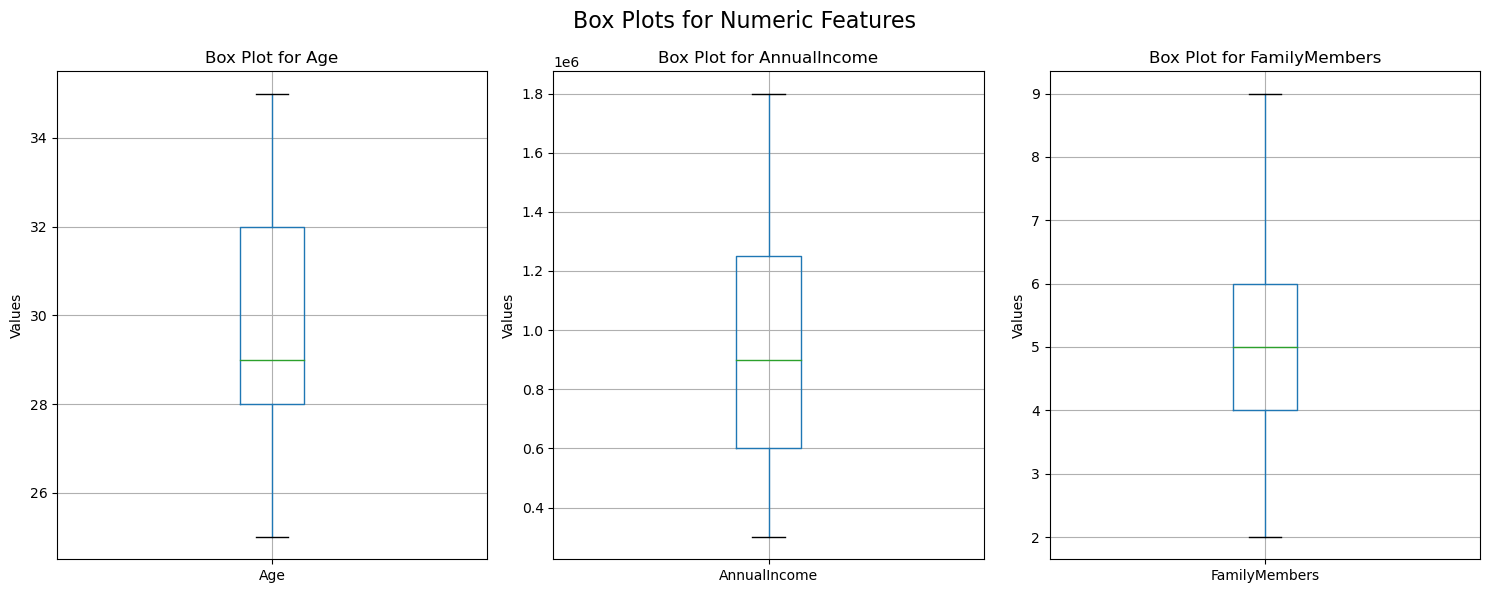

<IPython.core.display.Javascript object>

In [7]:
features = ["Age", "AnnualIncome", "FamilyMembers"]
fig, axes = plt.subplots(1, len(features), figsize=(15, 6))
for i, feature in enumerate(features):
    df.boxplot(column=feature, ax=axes[i])
    axes[i].set_title(f"Box Plot for {feature}")
    axes[i].set_ylabel("Values")
fig.suptitle("Box Plots for Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

* Dataset contains 5 columns of numeric values and 4 columns of string type(object). This information will be useful for future Travel Insurance prediction part.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   EmploymentType       1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


<IPython.core.display.Javascript object>

* I will add an additional column "Average annual income per family member" ('Income_person') to give an idea of how much income a family member receives on average, and further analysis will be through this point of view.

In [9]:
df["Income_person"] = round(
    df["AnnualIncome"] / df["FamilyMembers"],
)
df = df[
    [
        "Age",
        "EmploymentType",
        "GraduateOrNot",
        "AnnualIncome",
        "FamilyMembers",
        "Income_person",
        "ChronicDiseases",
        "FrequentFlyer",
        "EverTravelledAbroad",
        "TravelInsurance",
    ]
]
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,Income_person,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,66667.0,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,178571.0,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,125000.0,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,233333.0,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,87500.0,1,Yes,No,0


<IPython.core.display.Javascript object>

* Checking realtions between features with respect to Travel Insurance feature: 

TravelInsurance    1.000000
AnnualIncome       0.396763
Income_person      0.249420
FamilyMembers      0.079909
Age                0.061060
ChronicDiseases    0.018190
Name: TravelInsurance, dtype: float64


<AxesSubplot: >

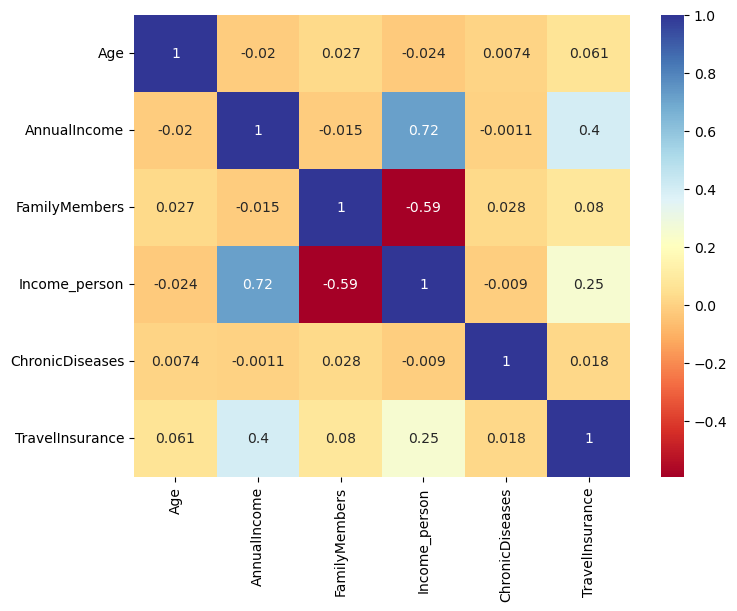

<IPython.core.display.Javascript object>

In [10]:
correlations = (
    df.corr(numeric_only=True)["TravelInsurance"].abs().sort_values(ascending=False)
)
print(correlations)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2g", cmap="RdYlBu", cbar=True)

### What is the age scale in dataset?
*The biggest group of participants is of 28 years old (25 %), the smallest group (3.27% and 3.02%) are of 30, 35 years old.

The age range in dataset:  25 - 35 years


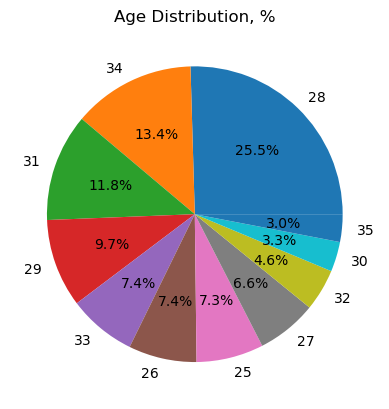

<IPython.core.display.Javascript object>

In [11]:
print("The age range in dataset: ", df.Age.min(), "-", df.Age.max(), "years")
age_counts = df["Age"].value_counts()
fig, ax = plt.subplots()
ax.pie(age_counts, labels=age_counts.index, autopct="%1.1f%%")
plt.title("Age Distribution, %")
plt.show()

### What is age distribution in relation with travel insurance?

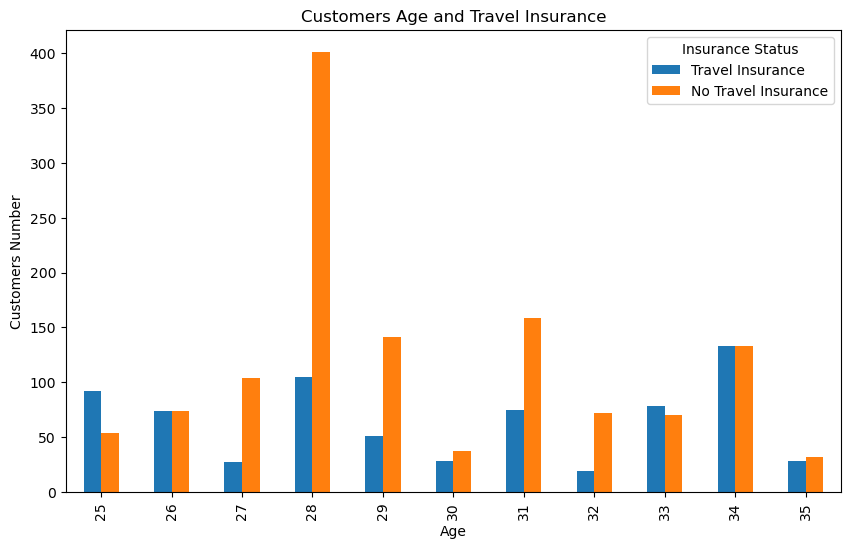

<IPython.core.display.Javascript object>

In [12]:
df_travel_insurance = df[df["TravelInsurance"] == 1]
df_no_travel_insurance = df[df["TravelInsurance"] == 0]
age_by_travel_counts = df_travel_insurance["Age"].value_counts()
age_by_no_travel_counts = df_no_travel_insurance["Age"].value_counts()
age_counts_df = pd.DataFrame(
    {
        "Travel Insurance": age_by_travel_counts,
        "No Travel Insurance": age_by_no_travel_counts,
    }
)
age_counts_df.sort_index(inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
age_counts_df.plot(kind="bar", ax=ax)
ax.set_title("Customers Age and Travel Insurance")
ax.set_xlabel("Age")
ax.set_ylabel("Customers Number")
plt.legend(title="Insurance Status", loc="upper right")
plt.show()

### What employment group tends to buy travel insurance ?

* Customers from Private sector tends to buy travel insurance more than people working for Government.

Customers working in Government sector in total:  570
Customers working in Private/Self Employed sector in total:  1417


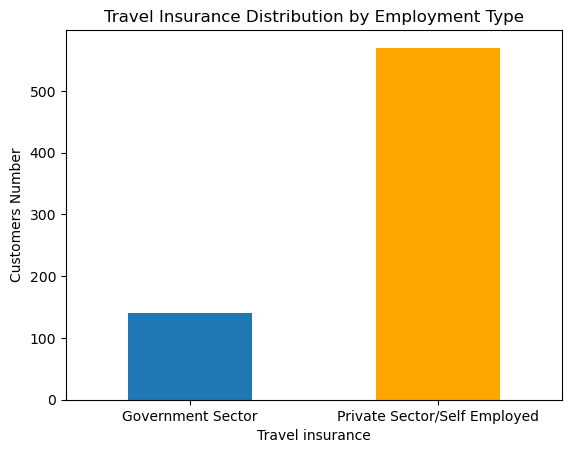

<IPython.core.display.Javascript object>

In [13]:
print(
    "Customers working in Government sector in total: ",
    df["EmploymentType"].value_counts()[1],
)
print(
    "Customers working in Private/Self Employed sector in total: ",
    df["EmploymentType"].value_counts()[0],
)
df["EmploymentType"].value_counts()
df_travel_insurance = df[df["TravelInsurance"] == 1]
insurance_by_employment_counts = df_travel_insurance.groupby("EmploymentType").size()
fig, ax = plt.subplots()
insurance_by_employment_counts.plot(kind="bar", ax=ax)
ax.set_title("Travel Insurance Distribution by Employment Type")
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
ax.patches[1].set_facecolor("orange")
ax.set_xlabel("Travel insurance")
ax.set_ylabel("Customers Number")
plt.show()

### What is mean annual income for each employment type in relation with travel insurance purchase?

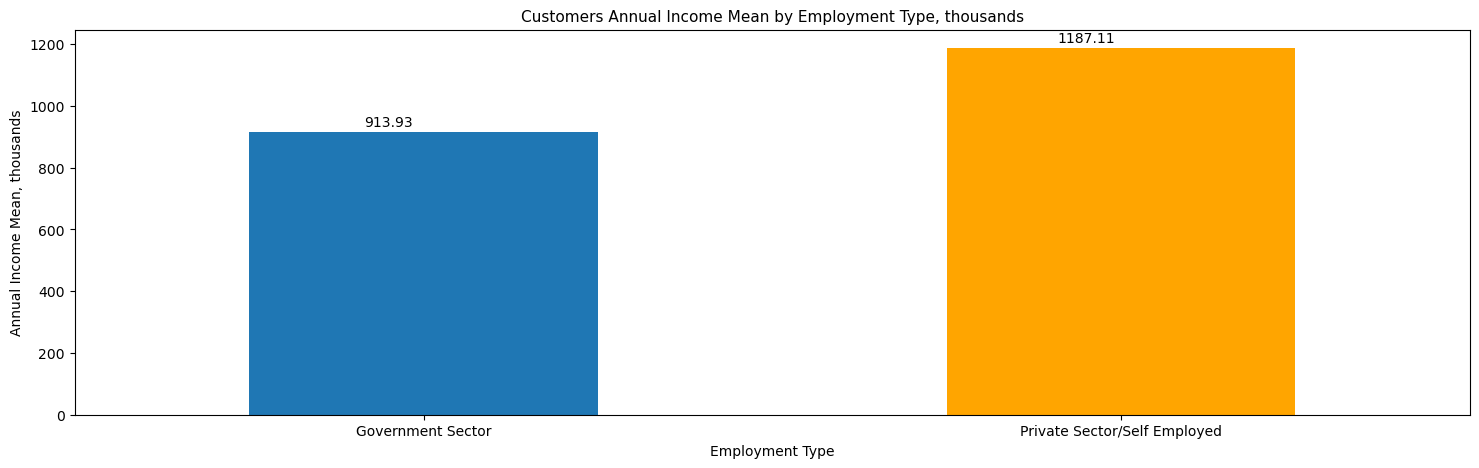

<IPython.core.display.Javascript object>

In [14]:
df_travel_insurance = df[df["TravelInsurance"] == 1]
mean_income_by_employment = (
    df_travel_insurance.groupby("EmploymentType")["AnnualIncome"].mean() / 1000
)
fig, ax = plt.subplots(figsize=(18, 5))
mean_income_by_employment.plot(kind="bar", ax=ax)
for i in ax.patches:
    ax.annotate(
        f"{i.get_height():.2f}",
        (i.get_x() + i.get_width() / 2.5, i.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset pixels",
    )
ax.set_title("Customers Annual Income Mean by Employment Type, thousands", fontsize=11)
ax.set_xlabel("Employment Type", fontsize=10)
ax.patches[1].set_facecolor("orange")
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")
ax.set_ylabel("Annual Income Mean, thousands", fontsize=10)
plt.show()

### What is the annual income by age and employment type among customers vs not customers:

* There are missing values due to lack of workers in the sector of certain age group(30 year old in government sector and 32 in private sector).

**Hypothesis**: only people on average higher incomes are likely to buy travel insurance;<br>
**Alternative**: There is no meaningful difference between travel insurance and average annual income

In [15]:
df_travel_insurance = df[df["TravelInsurance"] == 1]
df_no_travel_insurance = df[df["TravelInsurance"] == 0]

<IPython.core.display.Javascript object>

Let's check if data is normally distributed in our dataframe. For that I use Shapiro-Wilk Test and histogram to visualise results:

In [16]:
mean_income_travel_insurance = df_travel_insurance["AnnualIncome"].mean()
mean_income_no_travel_insurance = df_no_travel_insurance["AnnualIncome"].mean()

shapiro_test_travel_insurance = shapiro(df_travel_insurance["AnnualIncome"])
print("Shapiro-Wilk Test - Travel Insurance Group:")
print("Test Statistic =", shapiro_test_travel_insurance.statistic)
print("p-value =", shapiro_test_travel_insurance.pvalue)

shapiro_test_no_travel_insurance = shapiro(df_no_travel_insurance["AnnualIncome"])
print("\nShapiro-Wilk Test - No Travel Insurance Group:")
print("Test Statistic =", shapiro_test_no_travel_insurance.statistic)
print("p-value =", shapiro_test_no_travel_insurance.pvalue)

Shapiro-Wilk Test - Travel Insurance Group:
Test Statistic = 0.9257092475891113
p-value = 3.038776400003646e-18

Shapiro-Wilk Test - No Travel Insurance Group:
Test Statistic = 0.9574989080429077
p-value = 8.074549398830522e-19


<IPython.core.display.Javascript object>

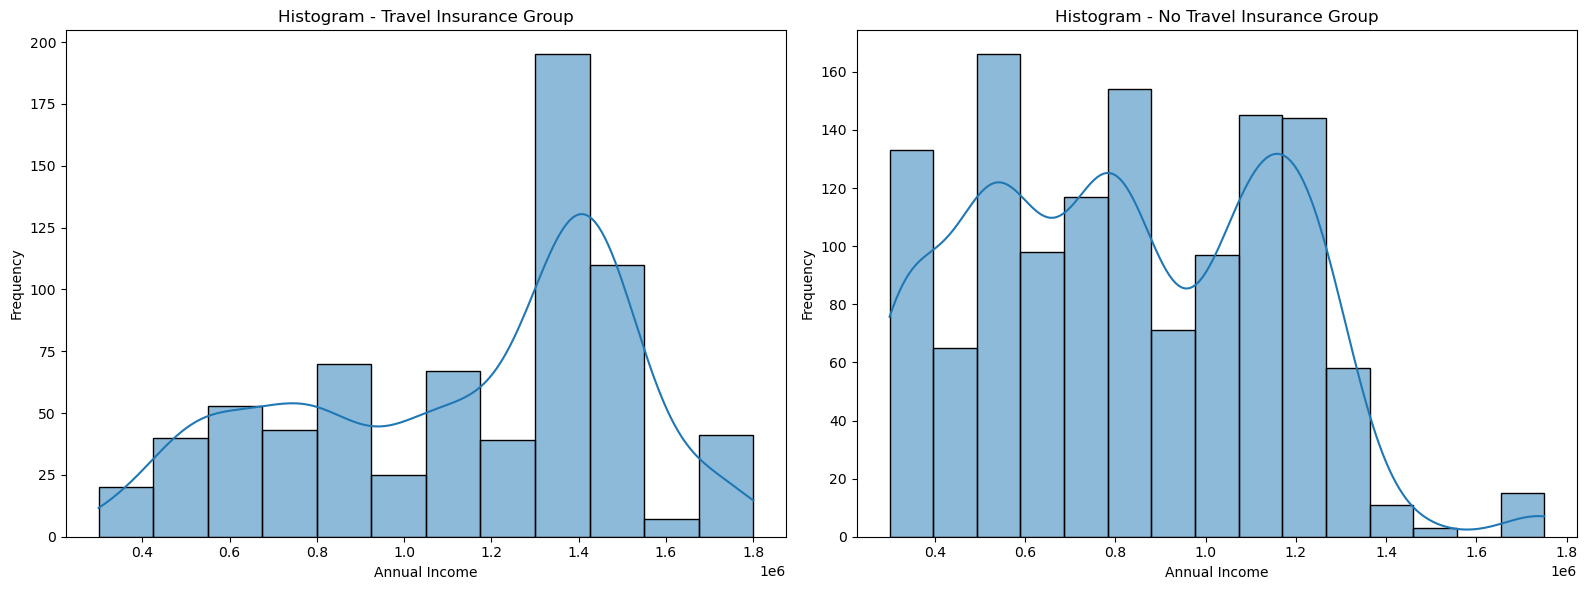

<IPython.core.display.Javascript object>

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df_travel_insurance["AnnualIncome"], kde=True, ax=axes[0])
axes[0].set_title("Histogram - Travel Insurance Group")
axes[0].set_xlabel("Annual Income")
axes[0].set_ylabel("Frequency")

sns.histplot(df_no_travel_insurance["AnnualIncome"], kde=True, ax=axes[1])
axes[1].set_title("Histogram - No Travel Insurance Group")
axes[1].set_xlabel("Annual Income")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

*  In both the "Travel Insurance Group" and the "No Travel Insurance Group," the Shapiro-Wilk test results p-values obtained are very close to zero, meaning that we reject the idea that the data in both groups is normally distributed.
* The histogram for the "Travel Insurance Group" shows a skewed distribution, with the majority of the data concentrated on the left side. The histogram's shape does not resemble a typical bell-shaped curve, which is indicative of a non-normal distribution.
* The histogram for the "No Travel Insurance Group" also exhibits a skewed distribution, with the majority of the data concentrated on the left side. Similar to the previous histogram, it lacks the characteristic bell-shaped curve associated with a normal distribution.

In [18]:
statistic, p_value = mannwhitneyu(
    df_travel_insurance["AnnualIncome"],
    df_no_travel_insurance["AnnualIncome"],
    alternative="two-sided",
)
alpha = 0.05
print("P-value: ", p_value)
if p_value < alpha:
    print(
        "There is a statistically significant difference in annual income between the groups."
    )
else:
    print(
        "There is no statistically significant difference in annual income between the groups."
    )

P-value:  3.0201010454885667e-70
There is a statistically significant difference in annual income between the groups.


<IPython.core.display.Javascript object>

In [19]:
mean_difference = round(
    (
        df_travel_insurance["AnnualIncome"].mean()
        - df_no_travel_insurance["AnnualIncome"].mean()
    ),
    2,
)
if mean_difference > 0:
    print(
        "The difference between travel insurance customers annual income mean and no travel insurance customers:",
        mean_difference,
    )
else:
    print(
        "The difference between no travel insurance customers annual income mean and travel insurance customers:",
        mean_difference,
    )

The difference between travel insurance customers annual income mean and no travel insurance customers: 311939.51


<IPython.core.display.Javascript object>

* Calculate the confidence interval for each group:

In [20]:
def confidence_int(df, column):
    travel_insured = df[column]
    sample_mean = travel_insured.mean()
    sample_std = travel_insured.std()
    confidence_level = 0.95
    standard_error = sample_std / np.sqrt(len(travel_insured))
    margin_of_error = standard_error * 1.96
    lower_bound = round((sample_mean - margin_of_error), 2)
    upper_bound = round((sample_mean + margin_of_error), 2)
    print(
        "{}% Confidence Interval for the Mean Annual Income:[{:.2f}, {:.2f}] rupee".format(
            confidence_level * 100, lower_bound, upper_bound
        )
    )


print("With travel insurance:")
confidence_int(df_travel_insurance, "AnnualIncome")
print("Without travel insurance:")
confidence_int(df_no_travel_insurance, "AnnualIncome")

With travel insurance:
95.0% Confidence Interval for the Mean Annual Income:[1105666.80, 1160812.07] rupee
Without travel insurance:
95.0% Confidence Interval for the Mean Annual Income:[803260.48, 839339.36] rupee


<IPython.core.display.Javascript object>

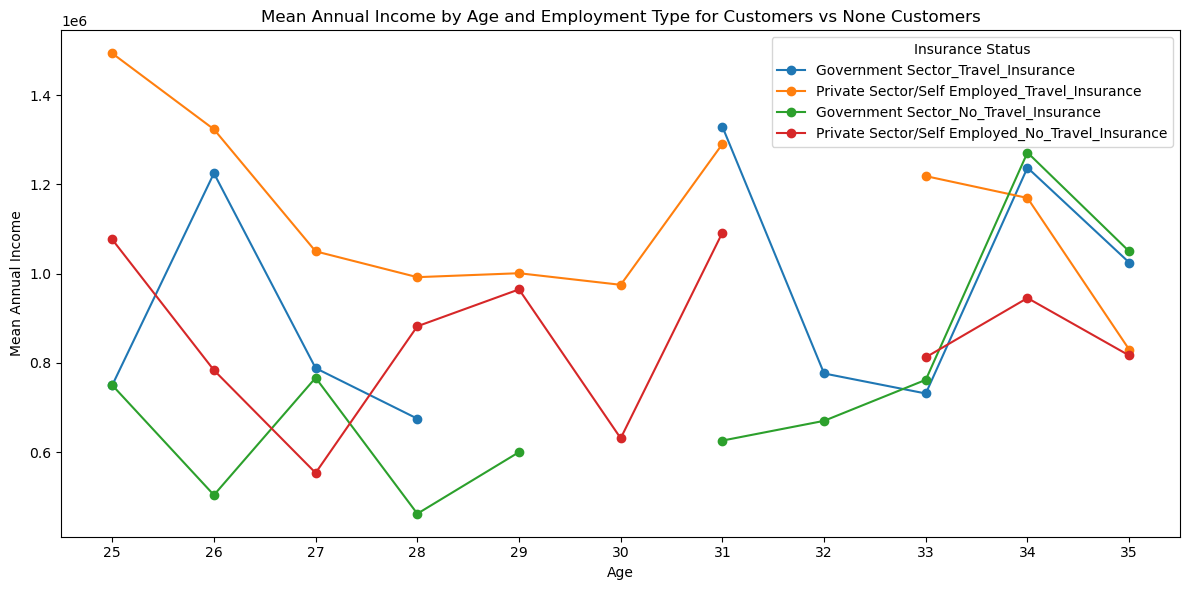

<IPython.core.display.Javascript object>

In [21]:
mean_income_by_age_employment = (
    df_travel_insurance.groupby(["Age", "EmploymentType"])["AnnualIncome"]
    .mean()
    .unstack()
    .reset_index()
)

mean_income_by_age_employment_no_insurance = (
    df_no_travel_insurance.groupby(["Age", "EmploymentType"])["AnnualIncome"]
    .mean()
    .unstack()
    .reset_index()
)

merged_df = pd.merge(
    mean_income_by_age_employment,
    mean_income_by_age_employment_no_insurance,
    on=["Age"],
    suffixes=["_Travel_Insurance", "_No_Travel_Insurance"],
)
merged_df = merged_df.set_index("Age")

fig, ax = plt.subplots(figsize=(12, 6))
for col in merged_df.columns[0:]:
    ax.plot(merged_df.index, merged_df[col], marker="o", label=col)

plt.xticks(merged_df.index)
ax.set_title(
    "Mean Annual Income by Age and Employment Type for Customers vs None Customers"
)
ax.set_xlabel("Age")
ax.set_ylabel("Mean Annual Income")
ax.legend(title="Insurance Status")

plt.tight_layout()
plt.show()

* The general observation is that people with higher annual incomes are more likely to buy travel insurance.
* Among customers under 31 with travel insurance, there is a significant difference between the private sector and the public sector, but for those aged 34 and over, the indicator reverses.
* Meanwhile, among non-clients, the overall average is significantly lower in both sectors compared to the client group. 

### What is the distribution of familly size in relation with travle insurance?

* Most of the family members count to 4 with lowest being 8 and 9.
* A clear trend, as the number of family members increases, the tendency to buy or not to buy travel insurance almost evens out.

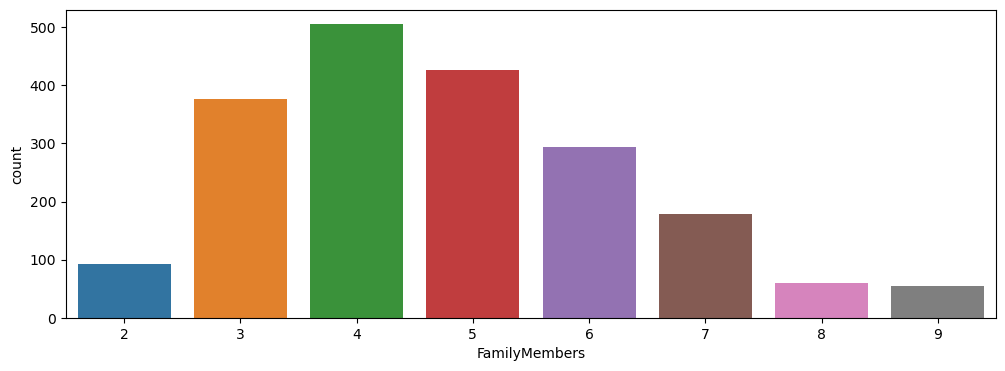

<IPython.core.display.Javascript object>

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data=df, x="FamilyMembers", ax=ax)
plt.show()

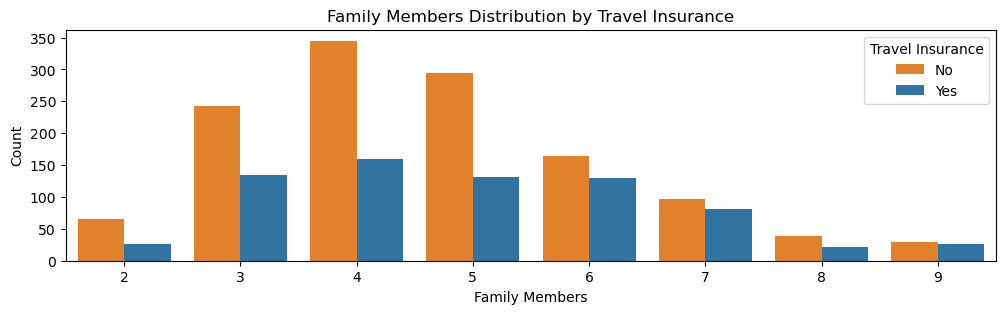

<IPython.core.display.Javascript object>

In [23]:
plt.figure(figsize=(12, 3))
sns.countplot(
    data=df,
    x="FamilyMembers",
    hue="TravelInsurance",
    palette={0: "tab:orange", 1: "tab:blue"},
)
plt.title("Family Members Distribution by Travel Insurance")
plt.xlabel("Family Members")
plt.ylabel("Count")
plt.legend(title="Travel Insurance", labels=["No", "Yes"])
plt.show()

### What is the distribution of annual income per person and family size in relation with travel isurance?:

In [24]:
mean_income_by_family_members = df.groupby("FamilyMembers")["Income_person"].mean()
mean_income_by_family_members

FamilyMembers
2    461559.139785
3    309946.986737
4    234702.970297
5    188920.187793
6    155952.357143
7    132704.696629
8    105402.542373
9    101616.145455
Name: Income_person, dtype: float64

<IPython.core.display.Javascript object>

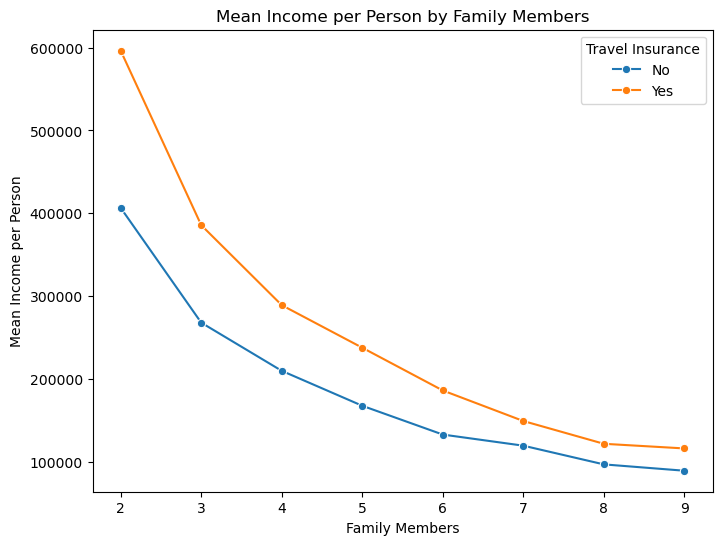

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    data=df,
    x="FamilyMembers",
    y="Income_person",
    hue="TravelInsurance",
    marker="o",
    linestyle="-",
    ci=None,
)

plt.title("Mean Income per Person by Family Members")
plt.xlabel("Family Members")
plt.ylabel("Mean Income per Person")
plt.legend(title="Travel Insurance", labels=["No", "Yes"])
plt.show()

* The general observation is that as the size of the family increases, the annual income decreases, and this trend is reflected equally in both groups (those who already have insurance and those who do not);


### What are the main observations among customers who already have travel insurance, have chronic illnesses, are frequent flyers, and whether they fly abroad frequently:

* Customers without chronic illnesses are more likely to buy travel insurance;
* Travel insurance is the most popular among infrequent flyers;
* Most customers also prefer to take out insurance on domestic routes;

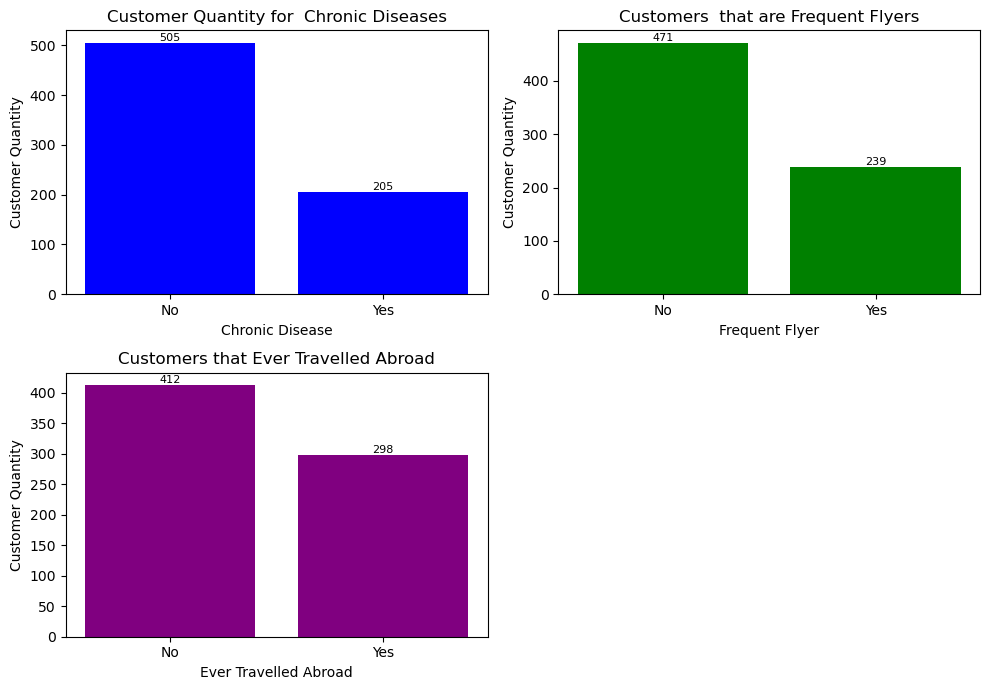

<IPython.core.display.Javascript object>

In [26]:
df_travel_insurance = df[df["TravelInsurance"] == 1]
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
chronic_disease_counts = df_travel_insurance["ChronicDiseases"].value_counts()
axes[0, 0].bar(chronic_disease_counts.index, chronic_disease_counts, color="blue")
for i, count in enumerate(chronic_disease_counts):
    axes[0, 0].text(i, count, str(count), ha="center", va="bottom", fontsize=8)
axes[0, 0].set_title("Customer Quantity for  Chronic Diseases")
axes[0, 0].set_xticks([0, 1], ["No", "Yes"])
axes[0, 0].set_xlabel("Chronic Disease")
axes[0, 0].set_ylabel("Customer Quantity")

frequent_flyer_counts = df_travel_insurance["FrequentFlyer"].value_counts()
axes[0, 1].bar(frequent_flyer_counts.index, frequent_flyer_counts, color="green")
for i, count in enumerate(frequent_flyer_counts):
    axes[0, 1].text(i, count, str(count), ha="center", va="bottom", fontsize=8)
axes[0, 1].set_title("Customers  that are Frequent Flyers")
axes[0, 1].set_xlabel("Frequent Flyer")
axes[0, 1].set_ylabel("Customer Quantity")

travel_abroad_counts = df_travel_insurance["EverTravelledAbroad"].value_counts()
for i, count in enumerate(travel_abroad_counts):
    axes[1, 0].text(i, count, str(count), ha="center", va="bottom", fontsize=8)
axes[1, 0].bar(travel_abroad_counts.index, travel_abroad_counts, color="purple")
axes[1, 0].set_title("Customers that Ever Travelled Abroad")
axes[1, 0].set_xlabel("Ever Travelled Abroad")
axes[1, 0].set_ylabel("Customer Quantity")
axes[1, 1].axis("off")
plt.tight_layout()
plt.show()

**Preparing data for modeling:**
 the feature engineering steps applied to data before applying to machine learning model:
- Feature Encoding
- Splitting data into training and test data
- Feature Scaling<br>
Here, we are trying to predict whether the traveller has a Travel Insurance or not using the given data. Hence, the TravelInsurance will be the y label and rest of the data will be the X or the input data.

In [27]:
X = df.drop("TravelInsurance", axis=1)
y = df["TravelInsurance"]

<IPython.core.display.Javascript object>

In [28]:
features = [
    "EmploymentType",
    "GraduateOrNot",
    "FrequentFlyer",
    "EverTravelledAbroad",
]
label_encoders = {}
for feature in features:
    label_encoder = LabelEncoder()
    X[feature] = label_encoder.fit_transform(X[feature])
    label_encoders[feature] = label_encoder

<IPython.core.display.Javascript object>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [30]:
len(X_train), len(X_test)

(1589, 398)

<IPython.core.display.Javascript object>

In [31]:
y_train.value_counts(), y_test.value_counts()

(TravelInsurance
 0    1020
 1     569
 Name: count, dtype: int64,
 TravelInsurance
 0    257
 1    141
 Name: count, dtype: int64)

<IPython.core.display.Javascript object>

* For KNeighborsClassifier lets find optimal number of neighbors:

In [32]:
def find_optimal(neighbors):
    score_list = []
    for i in range(neighbors):
        travel_ins = KNeighborsClassifier(n_neighbors=i + 1).fit(X_train, y_train)
        score_list.append(travel_ins.score(X_test, y_test))
    return score_list


max_val = max(find_optimal(50))
max_index = find_optimal(50).index(max_val) + 1
print(f"max score - {max_val}, optimal n_neighbors={max_index}")

max score - 0.8190954773869347, optimal n_neighbors=2


<IPython.core.display.Javascript object>

In [33]:
model_name = RandomForestClassifier()
param_grid = {
    "criterion": ["gini", "entropy"],
    "n_estimators": [100, 150, 200],
    "max_depth": [None, 1, 3, 5, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [5, 10],
}
grid_search = GridSearchCV(model_name, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for {model_name}: {best_params}")

Best parameters for RandomForestClassifier(): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


<IPython.core.display.Javascript object>

In [34]:
model_name = AdaBoostClassifier()
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5],
}
grid_search = GridSearchCV(model_name, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
best_params = grid_search.best_params_
print(f"Best parameters for {model_name}: {best_params}")

Best parameters for AdaBoostClassifier(): {'learning_rate': 0.2, 'n_estimators': 200}


<IPython.core.display.Javascript object>

In [35]:
model_name = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [1, 3, 5, 7],
}
grid_search = GridSearchCV(model_name, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
best_params = grid_search.best_params_
print(f"Best parameters for {model_name}: {best_params}")

Best parameters for KNeighborsClassifier(): {'n_neighbors': 5}


<IPython.core.display.Javascript object>

In [36]:
model_name = LogisticRegression()
param_grid = {"solver": ["lbfgs", "liblinear", "sag", "saga"]}
grid_search = GridSearchCV(model_name, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
best_params = grid_search.best_params_
print(f"Best parameters for {model_name}: {best_params}")

Best parameters for LogisticRegression(): {'solver': 'liblinear'}


<IPython.core.display.Javascript object>

In [37]:
model_name = GradientBoostingClassifier()
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5],
    "loss": ["log_loss", "exponential"],
}
grid_search = GridSearchCV(model_name, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
best_params = grid_search.best_params_
print(f"Best parameters for {model_name}: {best_params}")

Best parameters for GradientBoostingClassifier(): {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100}


<IPython.core.display.Javascript object>

In [38]:
model_name = XGBRFClassifier()
param_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5],
}
grid_search = GridSearchCV(model_name, param_grid=param_grid)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
best_params = grid_search.best_params_
print(f"Best parameters for {model_name}: {best_params}")

Best parameters for XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, ...): {'learning_rate': 0.001, 'n_estimators': 100}


<IPython.core.display.Javascript object>

## Training the Model

In [39]:
models = []
models.append(
    (
        "RF",
        RandomForestClassifier(
            criterion="entropy",
            max_depth=None,
            min_samples_leaf=5,
            min_samples_split=10,
            n_estimators=100,
        ),
    )
)
models.append(("Ada", AdaBoostClassifier(learning_rate=0.001, n_estimators=200)))
models.append(("KNN", KNeighborsClassifier(n_neighbors=2)))
models.append(("SVM", SVC()))
models.append(("LR", LogisticRegression(solver="liblinear")))
models.append(
    (
        "GB",
        GradientBoostingClassifier(
            learning_rate=0.01, loss="exponential", n_estimators=150
        ),
    )
)
models.append(("XGBR", XGBRFClassifier(learning_rate=0.001, n_estimators=100)))

<IPython.core.display.Javascript object>

In [40]:
names = []
scores = []
precisions = []
f1 = []

for name, model in models:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, pos_label=1.0))
    f1.append(f1_score(y_test, y_pred))

    names.append(name)

<IPython.core.display.Javascript object>

In [41]:
models_comparison = pd.DataFrame(
    {"Name": names, "Score": scores, "Precision": precisions, "F1": f1}
)
models_comparison.sort_values(by="Score", ascending=False, inplace=True)
print(models_comparison)

   Name     Score  Precision        F1
0    RF  0.844221   0.987654  0.720721
5    GB  0.844221   0.987654  0.720721
6  XGBR  0.844221   0.987654  0.720721
2   KNN  0.819095   0.925926  0.675676
3   SVM  0.801508   0.930556  0.629108
1   Ada  0.796482   0.954545  0.608696
4    LR  0.726131   0.716216  0.493023


<IPython.core.display.Javascript object>

* The gradient boosted model and XGBRFClassifier has the highest accurancy score and F1 score (balances both precision and recall (true positive rate) of a model). It scored the 1st highest in precision (measures the accuracy of the positive predictions made by a model). The model with the next highest accuracy is low in F1 score. Thus, GB is the selected model

* Next we check the features importance and taking features higher than 0.02 score usin:

In [42]:
features_weight = list(zip(X_train.columns, model.feature_importances_.round(2)))
features_weight

[('Age', 0.06),
 ('EmploymentType', 0.01),
 ('GraduateOrNot', 0.01),
 ('AnnualIncome', 0.24),
 ('FamilyMembers', 0.11),
 ('Income_person', 0.02),
 ('ChronicDiseases', 0.01),
 ('FrequentFlyer', 0.02),
 ('EverTravelledAbroad', 0.51)]

<IPython.core.display.Javascript object>

In [43]:
best_features = [feature[0] for feature in features_weight if feature[1] > 0.02]
X_best = X[best_features]
X_best

,Age,AnnualIncome,FamilyMembers,EverTravelledAbroad
0,31,400000,6,0
1,31,1250000,7,0
2,34,500000,4,0
3,28,700000,3,0
4,28,700000,8,0
...,...,...,...,...
1982,33,1500000,4,1
1983,28,1750000,5,1
1984,28,1150000,6,0
1985,34,1000000,6,1


<IPython.core.display.Javascript object>

In [44]:
names_after_feature = []
scores_after_feature = []
for name, model in models:
    kfold = KFold(n_splits=4, random_state=42, shuffle=True)
    score = cross_val_score(
        model, X_best, y.values.ravel(), cv=kfold, scoring="f1"
    ).mean()
    names_after_feature.append(name)
    scores_after_feature.append(score)

kf_cross_val = pd.DataFrame(
    {"Name": names_after_feature, "Score": scores_after_feature}
)
kf_cross_val = kf_cross_val.sort_values(by="Score", ascending=False)
kf_cross_val

,Name,Score
5,GB,0.719022
0,RF,0.718686
6,XGBR,0.715523
2,KNN,0.642040
3,SVM,0.602952
1,Ada,0.599046
4,LR,0.064631


<IPython.core.display.Javascript object>

* looking at f1 score with chosen features we see that models perform almost the same as the model without cropping features. This could be the reason, that dataset itself has a very small amount of features, so it is basically not worth to cut the dataset. Although, RandomForestClassifier performs better than previously.

* after specific features where picked, the GradientBoostingClassifier provides best accuracy scores (83.59%). However, if we look at f1 score, the model would be still a good advisor tool for sales person.

* Let's try to ensemble our models 4 models with top f1 score and see if united they provide better results:

In [47]:
gb = GradientBoostingClassifier(
    learning_rate=0.01, loss="exponential", n_estimators=150
)
rf = RandomForestClassifier(
    criterion="entropy", min_samples_leaf=5, min_samples_split=10, n_estimators=100
)
xgbr = XGBRFClassifier(learning_rate=0.001, n_estimators=100)

knn = KNeighborsClassifier(n_neighbors=2)

ensemble_model = VotingClassifier(estimators=[("GB", gb), ("KNN", knn)], voting="soft")
ensemble_model.fit(X_train, y_train.values.ravel())

y_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred)
ensemble_precision = precision_score(y_test, y_pred)
ensemble_f1 = f1_score(y_test, y_pred)

print("Ensemble Model Accuracy:", ensemble_accuracy)
print("Ensemble Model Precision:", ensemble_precision)
print("Ensemble Model F1 Score:", ensemble_f1)

Ensemble Model Accuracy: 0.8417085427135679
Ensemble Model Precision: 0.9239130434782609
Ensemble Model F1 Score: 0.7296137339055794


<IPython.core.display.Javascript object>

### Conclusions:

 Based on the available data for 2017-2019 year and a limited number of entries (1987), we are able to present the following estimates:
- Travel insurance salespeople should target possible customers over 30 years of age, working in the private sector (average salary is 1016 000), who do not suffer from chronic diseases, are not frequent flyers, and mostly fly on local routes.
- Of the selected models, the GradientBoostingClassifier had the best features with 83.59% accuracy. It is hoped that more data would improve the result, but for now it is not a bad tool for the salesman.
- Since we selected 4 models by combining their performances, we can say that 3 models (GradientBoostingClassifier, RandomForestClassifier, XGBRFClassifier) are similar to each other and their combined result is the same. The addition of the KNeighborsClassifier did not change the result, which leads us to believe that the available data table is not large enough to observe significant differences in performance.

## Improvements: 
More data would improve the quality of the analysis, as would further study of ML and exploration of tools.